https://hastie.su.domains/ElemStatLearn/datasets/SAheart.data

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [2]:
data_path = 'SAheart.data'

if os.path.exists(data_path):
    os.remove(data_path)
!wget https://hastie.su.domains/ElemStatLearn/datasets/SAheart.data

data = pd.read_csv(data_path)
data = data.drop('row.names', axis=1)
data['famhist'] = data['famhist'].map({'Absent': 0, 'Present': 1})
data = data.sample(frac=1, random_state=2).reset_index(drop=True)

display(data.describe().round(2))
data.info()
data.head()

--2024-10-09 21:46:22--  https://hastie.su.domains/ElemStatLearn/datasets/SAheart.data
Resolving hastie.su.domains (hastie.su.domains)... 159.89.149.97
Connecting to hastie.su.domains (hastie.su.domains)|159.89.149.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25106 (25K)
Saving to: ‘SAheart.data’

SAheart.data        100%[===================>]  24.52K  --.-KB/s    in 0.07s   

2024-10-09 21:46:23 (352 KB/s) - ‘SAheart.data’ saved [25106/25106]



,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
count,462.00,462.00,462.00,462.00,462.00,462.00,462.00,462.00,462.00,462.00
mean,138.33,3.64,4.74,25.41,0.42,53.10,26.04,17.04,42.82,0.35
std,20.50,4.59,2.07,7.78,0.49,9.82,4.21,24.48,14.61,0.48
min,101.00,0.00,0.98,6.74,0.00,13.00,14.70,0.00,15.00,0.00
25%,124.00,0.05,3.28,19.77,0.00,47.00,22.98,0.51,31.00,0.00
50%,134.00,2.00,4.34,26.12,0.00,53.00,25.80,7.51,45.00,0.00
75%,148.00,5.50,5.79,31.23,1.00,60.00,28.50,23.89,55.00,1.00
max,218.00,31.20,15.33,42.49,1.00,78.00,46.58,147.19,64.00,1.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    int64  
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 36.2 KB


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,124,3.04,4.80,19.52,1,60,21.78,147.19,41,1
1,136,7.36,2.19,28.11,1,61,25.00,61.71,54,0
2,124,0.81,6.16,11.61,0,35,21.47,10.49,26,0
3,108,3.00,1.59,15.23,0,40,20.09,26.64,55,0
4,162,7.00,7.67,34.34,1,33,30.77,0.00,62,0


In [3]:
# Split the data into features and target
X = data.drop('chd', axis=1)
y = data['chd']
features = X.columns
features

Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity',
       'alcohol', 'age'],
      dtype='object')

In [4]:
# Split the data into train (80%), validation (10%), and test (10%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

# Standardize the feature
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)
# X_test = scaler.transform(X_test)


Step 0: Log Likelihood = -315.3111205245116
Step 10: Log Likelihood = -303.3839716999498
Step 20: Log Likelihood = -303.3768885096974
Step 30: Log Likelihood = -303.3731825722092
Step 40: Log Likelihood = -303.37066890254147
Step 50: Log Likelihood = -303.3674189406295
Step 60: Log Likelihood = -303.3659937098859
Step 70: Log Likelihood = -303.3652061419775
Step 80: Log Likelihood = -303.364444526568
Step 90: Log Likelihood = -303.36454965609516


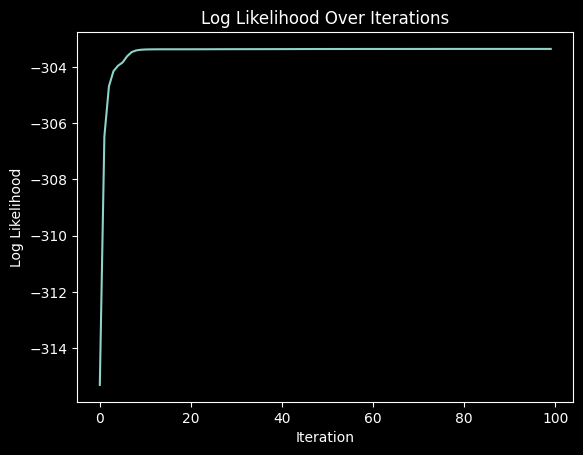

In [31]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegressionSGD:
    def __init__(self, learning_rate=0.01, C=0.01, num_steps=1000):
        self.learning_rate = learning_rate  # Step size for updating weights
        self.C = C  # Regularization strength (L1 penalty factor)
        self.num_steps = num_steps  # Number of iterations for training
        self.weights = None  # Weights will be initialized during training
        self.log_likelihood_values = []  # To store log likelihood values over iterations

    def sigmoid(self, z):
        # Sigmoid function to map input values to a probability
        # S(z) = 1 / (1 + exp(-z))
        return 1 / (1 + np.exp(-z))

    def predict(self, X):
        return self.sigmoid(np.dot(X, self.weights))

    def compute_log_likelihood(self, X, y):
        # log_likelihood = sum(y * log(predictions) + (1 - y) * log(1 - predictions))
        predictions = self.predict(X)
        return np.sum(y * np.log(predictions + 1e-9) + (1 - y) * np.log(1 - predictions + 1e-9)) # 1e-9 is added to prevent log(0)

    def fit(self, X, y):
        self.weights = np.random.randn(X.shape[1]) * 0.01  # Initialize weights with small random values to break symmetry
        
        for step in range(self.num_steps):
            # Shuffle data for stochasticity in each iteration to ensure better convergence
            # indices = np.arange(X.shape[0])
            # np.random.shuffle(indices)
            # X, y = X[indices], y[indices]
            
            for i in range(X.shape[0]):
                # Compute the predicted probability for the current sample
                predictions = self.predict(X[i])
                # Compute the error (difference between actual and predicted value)
                error = y[i] - predictions
                # Compute the gradient for the current sample
                gradient = X[i] * error
                
                # Update weights using the gradient and learning rate
                self.weights += self.learning_rate * gradient
                
                # L1 Regularization Penalty
                self.weights = np.sign(self.weights) * np.maximum(0, np.abs(self.weights) - self.learning_rate * self.C)
            
            log_likelihood = self.compute_log_likelihood(X, y)
            self.log_likelihood_values.append(log_likelihood)

            if step % 10 == 0:
                print(f"Step {step}: Log Likelihood = {log_likelihood}")

    def plot_log_likelihood(self):
        # Plot the log likelihood values over iterations to visualize convergence
        plt.plot(range(len(self.log_likelihood_values)), self.log_likelihood_values)
        plt.xlabel('Iteration')
        plt.ylabel('Log Likelihood')
        plt.title('Log Likelihood Over Iterations')
        plt.show()


# Example usage
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2)

# Train logistic regression using SGD with L1 regularization
model = LogisticRegressionSGD(learning_rate=0.01, C=0.01, num_steps=100)
model.fit(X, y)
model.plot_log_likelihood()

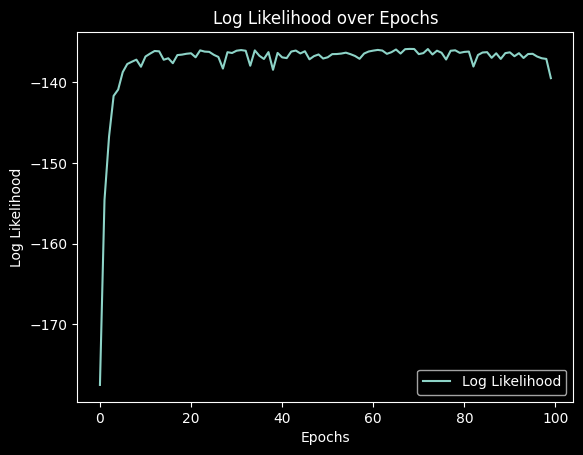

Accuracy: 95.40%


In [29]:
class LogisticRegressionSGD:
    def __init__(self, learning_rate=0.01, epochs=1000, penalty=None, alpha=0.01):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.penalty = penalty  # 'l1', 'l2', or None
        self.alpha = alpha
        self.weights = None
        self.log_likelihoods = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)

        for epoch in range(self.epochs):
            for i in range(n_samples):
                random_idx = np.random.randint(n_samples)
                x_i = X[random_idx]
                y_i = y[random_idx]

                linear_model = np.dot(x_i, self.weights)
                y_pred = self.sigmoid(linear_model)
                error = y_i - y_pred

                # Update weights
                gradient = error * x_i
                self.weights += self.learning_rate * gradient

                # Apply L1 or L2 regularization penalty
                if self.penalty == 'l2':
                    self.weights -= self.learning_rate * self.alpha * self.weights
                elif self.penalty == 'l1':
                    self.weights -= self.learning_rate * self.alpha * np.sign(self.weights)

            # Calculate log likelihood for the epoch
            log_likelihood = self.calculate_log_likelihood(X, y)
            self.log_likelihoods.append(log_likelihood)

    def calculate_log_likelihood(self, X, y):
        linear_model = np.dot(X, self.weights)
        y_pred = self.sigmoid(linear_model)
        log_likelihood = np.sum(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))
        return log_likelihood

    def predict(self, X):
        linear_model = np.dot(X, self.weights)
        y_pred = self.sigmoid(linear_model)
        return np.where(y_pred >= 0.5, 1, 0)

    def plot_log_likelihood(self):
        plt.plot(range(self.epochs), self.log_likelihoods, label="Log Likelihood")
        plt.xlabel("Epochs")
        plt.ylabel("Log Likelihood")
        plt.title("Log Likelihood over Epochs")
        plt.legend()
        plt.show()

# Example usage
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2)

# Train logistic regression using SGD
model = LogisticRegressionSGD(learning_rate=0.01, epochs=100, penalty=None, alpha=0.01)
model.fit(X, y)
model.plot_log_likelihood()

# Predict
y_pred = model.predict(X)
accuracy = np.mean(y_pred == y)
print(f"Accuracy: {accuracy * 100:.2f}%")